# Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
print(X); print(y)

[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=1, interaction_only=True)
phi = poly.fit_transform(X)
#print(poly.get_feature_names())
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
# Vaš kôd ovdje
w = np.linalg.inv(phi.transpose().dot(phi)).dot(phi.transpose()).dot(y)
print(w)
w_pinv = np.linalg.pinv(phi).dot(y)
w_pinv - w < 1e-12

[2.2        0.45714286]


array([ True,  True])

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [7]:
# Vaš kôd ovdje
from sklearn.metrics import mean_squared_error
print(phi); print("\nOcekivani y:\n" + str(y))

err = 0.0
y_pred = []
for i in range(len(phi)):
    y_pred.append(w.transpose().dot(phi[i]))
    err += (y[i] - y_pred[i])**2
err
print("\nPredicted y:")
print(y_pred)

v = ((y - y.mean()) ** 2).sum()
r2 = 1 - err/v
print("\nR^2:    " + str(r2))

e_mse = mean_squared_error(y, y_pred)
e_mse
print("MSE:    " + str(e_mse))
err /= 2
print("E(h|D): " + str(err))

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]

Ocekivani y:
[4 1 2 5]

Predicted y:
[2.2, 2.6571428571428575, 3.1142857142857143, 4.0285714285714285]

R^2:    0.18285714285714272
MSE:    2.042857142857143
E(h|D): 4.085714285714286


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
# Vaš kôd ovdje
uninv = np.array([[1,2,3],[4,5,6]])
p = PolynomialFeatures(degree=1, interaction_only=True)
phi_uninv = p.fit_transform(uninv)
print(phi_uninv)
np.linalg.inv(uninv) # ovo puca

[[1. 1. 2. 3.]
 [1. 4. 5. 6.]]


LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Vaš kôd ovdje
#print(phi); print(y)
reg = LinearRegression().fit(phi, y)
print("R^2 score: " + str(reg.score(phi, y)))
print("R^2 prev:  " + str(r2))
print("w        :" + str(w) + "\nreg.coef_:" + str(reg.coef_))
print("intercept: " + str(reg.intercept_))
print("\nPredicted (reg):  " + str(reg.predict(phi)))
print("Predicted (mine): " + str(y_pred))

R^2 score: 0.18285714285714272
R^2 prev:  0.18285714285714272
w        :[2.2        0.45714286]
reg.coef_:[0.         0.45714286]
intercept: 2.2

Predicted (reg):  [2.2        2.65714286 3.11428571 4.02857143]
Predicted (mine): [2.2, 2.6571428571428575, 3.1142857142857143, 4.0285714285714285]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def fun(x):
    return (5 + x - 2*x**2 - 5*x**3)

def noise(x, sigma):
     return (x + np.random.normal(0, sigma, 1))

def make_labels(X, f, noise_=0) :
    return np.array([np.array([noise(f(x[0]), noise_) ]) for x in X]).reshape(len(X), 1)

In [40]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

N = 50
sigma = 200

X_2 = make_instances(-5, 5, N)
y_2 = make_labels(X_2, fun, sigma)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

In [13]:
# Vaš kôd ovdj
matplotlib.pyplot.scatter(X_2, y_2)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [14]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=3, interaction_only=False)
phi = poly.fit_transform(X_2)
reg = LinearRegression().fit(phi, y_2)
y_pred = reg.predict(phi)
print(mean_squared_error(y_2, y_pred))
matplotlib.pyplot.scatter(X_2, y_2)
matplotlib.pyplot.plot(X_2, y_pred)

51427.41609255666


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

In [15]:
# Vaš kôd ovdje
degs = [1,3,5,10,20]
handles = []
for d in degs:
    poly = PolynomialFeatures(degree=d, interaction_only=False)
    phi = poly.fit_transform(X_2)
    reg = LinearRegression().fit(phi, y_2)
    y_pred = reg.predict(phi)
    print("Poly of degree " + str(d) + " MSE " + str(mean_squared_error(y_2, y_pred)))
    handles.append(d)
    matplotlib.pyplot.plot(X_2, y_pred)
matplotlib.pyplot.legend(handles)

Poly of degree 1 MSE 60422.72100068573
Poly of degree 3 MSE 51427.41609255666
Poly of degree 5 MSE 50784.92410983063
Poly of degree 10 MSE 42223.419299392386
Poly of degree 20 MSE 38935.426786157346


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

Poly of degree 1 MSE 83611.32384537597
Poly of degree 2 MSE 116237.8605262663
Poly of degree 3 MSE 93535.9651165236
Poly of degree 4 MSE 100944.55789639341
Poly of degree 5 MSE 116969.38759300984
Poly of degree 6 MSE 175564.31762923225
Poly of degree 7 MSE 129758.47846326888
Poly of degree 8 MSE 117044.08138212116
Poly of degree 9 MSE 123142.07853181858
Poly of degree 10 MSE 607561.6823476851
Poly of degree 11 MSE 1173283.202251454
Poly of degree 12 MSE 15498245.74761378
Poly of degree 13 MSE 17820259.83579949
Poly of degree 14 MSE 90444018.36571331
Poly of degree 15 MSE 872311148.3003874
Poly of degree 16 MSE 5918617759.73128
Poly of degree 17 MSE 3902432137939.212
Poly of degree 18 MSE 114218232593.19022
Poly of degree 19 MSE 74459150805204.31
Poly of degree 20 MSE 1910026544166096.0


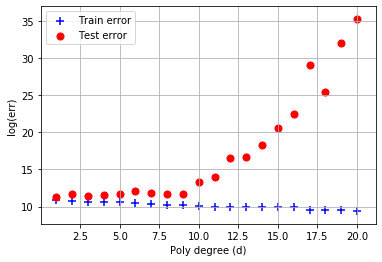

In [17]:
# Vaš kôd ovdje
fig = matplotlib.pyplot.figure()
ax = subplot(111)
grid(True)

degs = list(range(1, 21))
for d in degs:
    poly = PolynomialFeatures(degree=d, interaction_only=False)
    phi = poly.fit_transform(X_2)
    
    X_train, X_test, y_train, y_test = train_test_split(phi, y_2, test_size=0.5, random_state=31337)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print("Poly of degree " + str(d) + " MSE " + str(mean_squared_error(y_test, y_pred)))
    
    y_lrn = reg.predict(X_train)
    err_train = mean_squared_error(y_lrn, y_train)
    err_pred = mean_squared_error(y_test, y_pred)
    
    ax.set(xlabel="Poly degree (d)", ylabel="log(err)")
    ax.scatter(d, log(err_train), s=50, c='b', marker='+')
    ax.scatter(d, log(err_pred), s=50, c='r', marker='o')
ax.legend(["Train error", "Test error"])

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

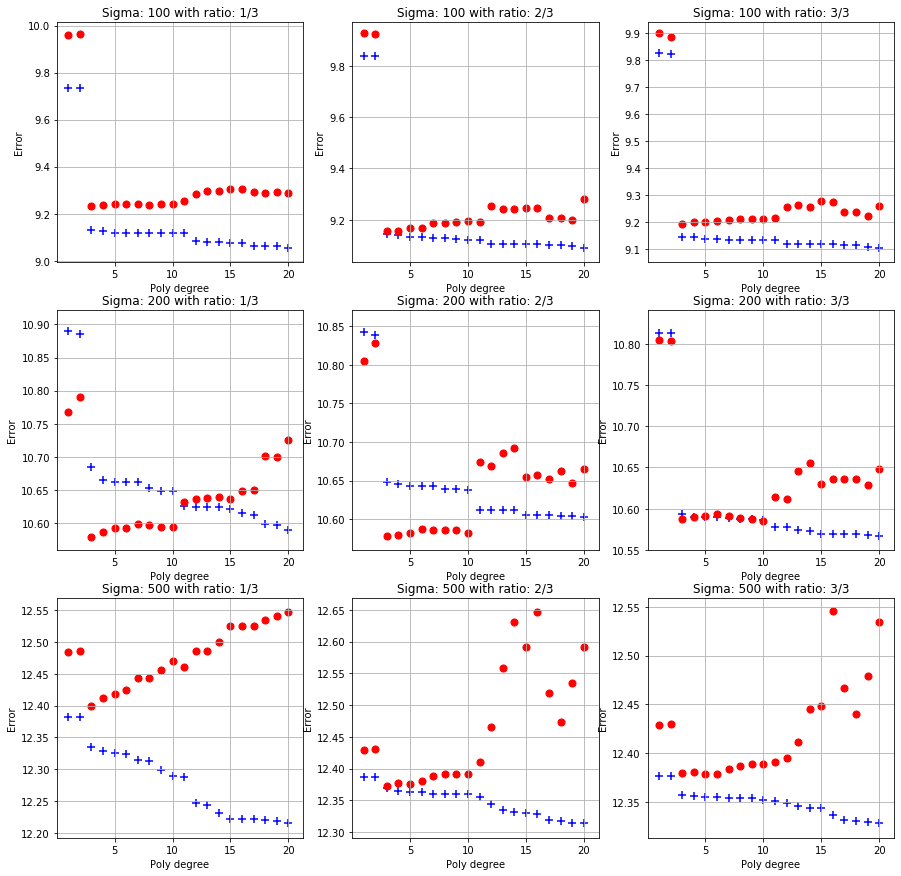

In [20]:
# Vaš kôd ovdje
fig = matplotlib.pyplot.subplots(3, 3, figsize=(15, 15))

sigmas = [100, 200, 500]
ratios = [1, 2, 3]

N = 1000
X_all = make_instances(-5, 5, N)
ctr = 1
for s in sigmas:
    y_all = make_labels(X_all, fun, s)
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.5, random_state=31337)
    
    for n in ratios:
        sset_xtrain = X_train[:int(n/3 * 500)]
        sset_ytrain = y_train[:int(n/3 * 500)]
        
        sset_xtest = X_test[:int(n/3 * 500)]
        sset_ytest = y_test[:int(n/3 * 500)]
        
        ax = subplot(3, 3, ctr)
        ctr += 1
        for d in degs:
            poly = PolynomialFeatures(degree=d, interaction_only=False)
            phi_train = poly.fit_transform(sset_xtrain)
            phi_test = poly.fit_transform(sset_xtest)
            
            reg = LinearRegression().fit(phi_train, sset_ytrain)
            y_lrn = reg.predict(phi_train)
            y_pred = reg.predict(phi_test)
            err_train = mean_squared_error(y_lrn, sset_ytrain)
            err_pred = mean_squared_error(sset_ytest, y_pred)
        
            ax.set(title="Sigma: " + str(s) + " with ratio: " + str(n) + "/3")
            ax.set(ylabel="Error", xlabel="Poly degree")
            ax.grid(True)
            ax.scatter(d, log(err_train), s=50, c='b', marker='+')
            ax.scatter(d, log(err_pred), s=50, c='r', marker='o')
            


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [26]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(degree=3, interaction_only=False)
phi = poly.fit_transform(X)
#print(phi); print(y)
idt = np.identity(4)
idt[0] = 0

for l in [0, 1, 10]:
    w = np.linalg.inv(phi.transpose().dot(phi) + l*idt).dot(phi.transpose()).dot(y)
    print(str(w) + " for lambda " + str(l))

[ 4.         -5.91666667  3.375      -0.45833333] for lambda 0
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ] for lambda 1
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ] for lambda 10


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [27]:
from sklearn.linear_model import Ridge

In [28]:
# Vaš kôd ovdje
for l in [0, 1, 10]:
    reg = Ridge(alpha=l)
    reg.fit(phi, y)
    print(str(reg.intercept_) + " " + str(reg.coef_) + " for lambda " + str(l))

4.000000000000028 [ 0.         -5.91666667  3.375      -0.45833333] for lambda 0
3.0569614512471652 [ 0.         -0.69079365 -0.2831746   0.1445805 ] for lambda 1
2.4944418431229725 [ 0.         -0.15897295 -0.13423067  0.0815601 ] for lambda 10


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

In [35]:
# Vaš kôd ovdje
handles = []
for l in [0, 100]:
    for d in [2, 10]:
        poly = PolynomialFeatures(degree=d, interaction_only=False)
        phi = poly.fit_transform(X_2)
        reg = Ridge(alpha=l)
        reg.fit(phi, y_2)
        y_pred = reg.predict(phi)
        matplotlib.pyplot.plot(X_2, y_pred)
        handles.append((l, d))
        
matplotlib.pyplot.scatter(X_2, y_2)
matplotlib.pyplot.legend(handles)

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


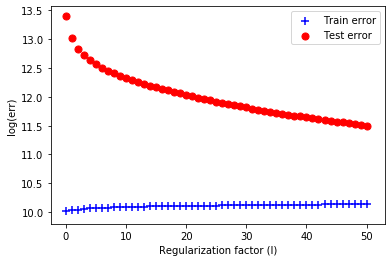

In [59]:
# Vaš kôd ovdje

#N = 50
#X_2 = make_instances(-5, 5, N)
#y_2 = make_labels(X_2, fun, 200)

poly = PolynomialFeatures(degree=10, interaction_only=False)
phi = poly.fit_transform(X_2)
X_train, X_test, y_train, y_test = train_test_split(phi, y_2, test_size=0.5, random_state=31337)

fig = matplotlib.pyplot.figure()
ax = subplot(111)
for l in range(51):
    reg = Ridge(alpha=l)
    reg.fit(X_train, y_train)
    
    y_pred = reg.predict(X_test)
    y_trn = reg.predict(X_train)
    
    err_train = mean_squared_error(y_trn, y_train)
    err_test = mean_squared_error(y_pred, y_test)
    
    ax.set(xlabel="Regularization factor (l)", ylabel="log(err)")
    ax.scatter(l, log(err_train), s=50, c='b', marker='+')
    ax.scatter(l, log(err_test), s=50, c='r', marker='o')
ax.legend(["Train error", "Test error"])

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [60]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

10


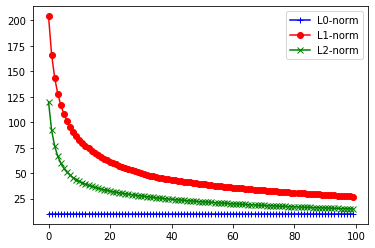

In [81]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=10, interaction_only=False)
phi = poly.fit_transform(X_2)
X_train, X_test, y_train, y_test = train_test_split(phi, y_2, test_size=0.5, random_state=31337)

l0s = []
l1s = []
l2s = []
for l in range(1, 101):
    reg = Ridge(alpha=l)
    reg.fit(X_train, y_train)
    
    w = reg.coef_[0][1:]
    l0 = nonzeroes(w)
    l1 = np.linalg.norm(w, ord=1)
    l2 = np.linalg.norm(w, ord=2)
    l0s.append(l0); l1s.append(l1); l2s.append(l2);

matplotlib.pyplot.plot(l0s, c='b', marker='+')
matplotlib.pyplot.plot(l1s, c='r', marker='o')
matplotlib.pyplot.plot(l2s, c='g', marker='x')
matplotlib.pyplot.legend(["L0-norm", "L1-norm", "L2-norm"])
print(l0s[-1])

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313929.28863423975, tolerance: 227.35231270513205
  positive)
/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316865.5926136156, tolerance: 227.35231270513205
  positive)
/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319585.96769786085, tolerance: 227.35231270513205
  positive)
/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322089.15059349703, tolerance: 227.

/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354035.3143867556, tolerance: 227.35231270513205
  positive)
/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354094.93318932346, tolerance: 227.35231270513205
  positive)
/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354152.75592021615, tolerance: 227.35231270513205
  positive)
/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354208.619159148, tolerance: 227.35

8


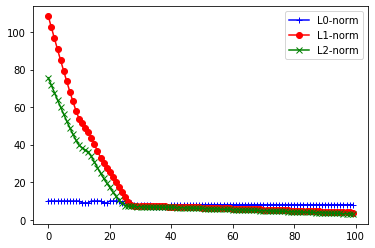

In [87]:
# Vaš kôd ovdje
from sklearn.linear_model import Lasso

poly = PolynomialFeatures(degree=10, interaction_only=False)
phi = poly.fit_transform(X_2)
X_train, X_test, y_train, y_test = train_test_split(phi, y_2, test_size=0.5, random_state=31337)

l0s = []
l1s = []
l2s = []
for l in range(1, 101):
    reg = Lasso(alpha=l)
    reg.fit(X_train, y_train)
    
    w = reg.coef_[1:]
    l0 = nonzeroes(w)
    l1 = np.linalg.norm(w, ord=1)
    l2 = np.linalg.norm(w, ord=2)
    l0s.append(l0); l1s.append(l1); l2s.append(l2);

matplotlib.pyplot.plot(l0s, c='b', marker='+')
matplotlib.pyplot.plot(l1s, c='r', marker='o')
matplotlib.pyplot.plot(l2s, c='g', marker='x')
matplotlib.pyplot.legend(["L0-norm", "L1-norm", "L2-norm"])
print(l0s[-1])

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [88]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

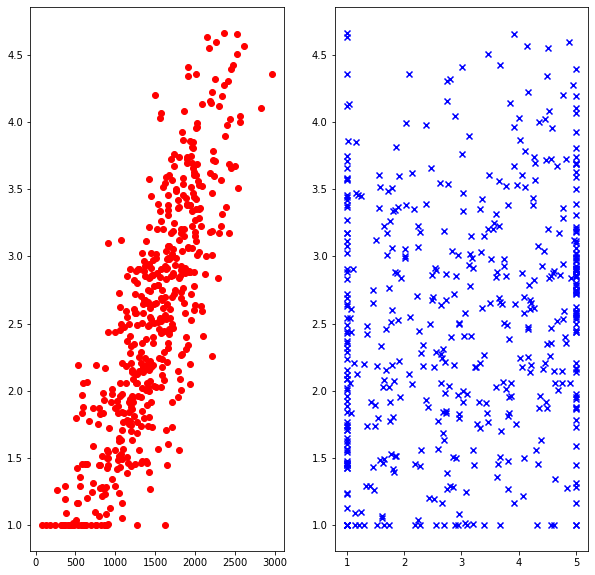

In [89]:
# Vaš kôd ovdje
fig = matplotlib.pyplot.subplots(1, 2, figsize=(10, 10))
ax1 = subplot(1,2,1)
ax2 = subplot(1,2,2)
ax1.scatter(exam_score, grades_y, c='r', marker='o')
ax2.scatter(grade_in_highschool, grades_y, c='b', marker='x')

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [95]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=1, interaction_only=False)
phi = poly.fit_transform(grades_X)
reg = Ridge(alpha=0.01)
y_pred = reg.fit(phi, grades_y)

print(reg.coef_)
print(reg.intercept_)

[0.         0.00141497 0.09477276]
0.15061179575776196


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [96]:
from sklearn.preprocessing import StandardScaler

StandardScaler(copy=True, with_mean=True, with_std=True)
[1461.13          3.00684164]
StandardScaler(copy=True, with_mean=True, with_std=True)
[2.50303164]
[[0.         0.81630375 0.15167761]]
[8.07023426e-17]


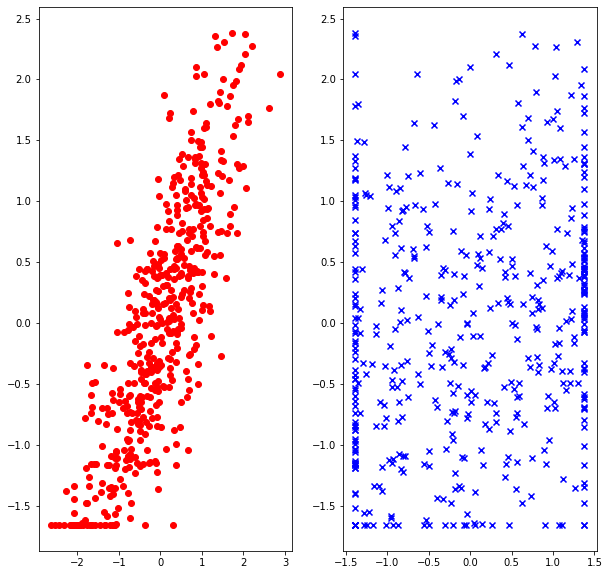

In [97]:
# Vaš kôd ovdje
scaler = StandardScaler()
print(scaler.fit(grades_X))
print(scaler.mean_)
grades_X_fixed = scaler.transform(grades_X)

scaler = StandardScaler()
print(scaler.fit(grades_y.reshape(-1, 1)))
print(scaler.mean_)
grades_y_fixed = scaler.transform(grades_y.reshape(-1, 1))

fig = matplotlib.pyplot.subplots(1, 2, figsize=(10, 10))
ax1 = subplot(1,2,1)
ax2 = subplot(1,2,2)
ax1.scatter(grades_X_fixed[:, 0], grades_y_fixed, c='r', marker='o')
ax2.scatter(grades_X_fixed[:, 1], grades_y_fixed, c='b', marker='x')

poly = PolynomialFeatures(degree=1, interaction_only=False)
phi = poly.fit_transform(grades_X_fixed)
reg = Ridge(alpha=0.01)
y_pred = reg.fit(phi, grades_y_fixed)

print(reg.coef_)
print(reg.intercept_)

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [98]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.insert(grades_X_fixed, 2, grades_X_fixed[:, 1], axis=1)
grades_X_fixed_colinear

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [100]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=1, interaction_only=False)
phi = poly.fit_transform(grades_X_fixed_colinear)
reg = Ridge(alpha=0.01)
y_pred = reg.fit(phi, grades_y_fixed)

print(reg.coef_)
print(reg.intercept_)

[[0.         0.81630364 0.07583957 0.07583957]]
[8.07031579e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [104]:
# Vaš kôd ovdje
lows = []
highs = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y, test_size=0.5, random_state=31337*i)
    poly = PolynomialFeatures(degree=1, interaction_only=False)
    
    #phi = poly.fit_transform(X_train)
    reg_low = Ridge(alpha=0.01)
    reg_low.fit(X_train, y_train)
    lows.append(reg_low.coef_)
    
    reg_high = Ridge(alpha=1000)
    reg_high.fit(X_train, y_train)
    highs.append(reg_high.coef_)
    print(reg_low.coef_)
    print(reg_high.coef_)
    print()

lows = np.array(lows)
highs = np.array(highs) 
print("std-dev:")
print(np.std(lows, axis=0))
print(np.std(highs, axis=0))

[0.74310419 0.04471543 0.04471543]
[0.14842611 0.01869833 0.01869833]

[0.73383363 0.06759576 0.06759576]
[0.14527712 0.03245059 0.03245059]

[0.73298649 0.0511079  0.0511079 ]
[0.14965676 0.02579266 0.02579266]

[0.74861367 0.06269832 0.06269832]
[0.15064873 0.03112292 0.03112292]

[0.73415239 0.06355839 0.06355839]
[0.14747085 0.03224236 0.03224236]

[0.72582124 0.04618701 0.04618701]
[0.1585501  0.02768724 0.02768724]

[0.74468542 0.0709371  0.0709371 ]
[0.14244438 0.03182396 0.03182396]

[0.74747981 0.06174846 0.06174846]
[0.15885485 0.03393071 0.03393071]

[0.75064832 0.08404526 0.08404526]
[0.15608658 0.0414033  0.0414033 ]

[0.80111337 0.07673076 0.07673076]
[0.15264378 0.03451788 0.03451788]

std-dev:
[0.01985586 0.01214868 0.01214868]
[0.00523675 0.00568283 0.00568283]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [105]:
# Vaš kôd ovdje
idt = np.identity(3)
idt[0] = 0
mat = grades_X_fixed_colinear.transpose().dot(grades_X_fixed_colinear)

m1 = mat + 0.01*idt
print(str(m1) + "\n")
m2 = mat + 10*idt
print(str(m2) + "\n")

print(numpy.linalg.cond(m1))
print(numpy.linalg.cond(m2))

[[500.          37.00469301  37.00469301]
 [ 37.00469301 500.01       500.        ]
 [ 37.00469301 500.         500.01      ]]

[[500.          37.00469301  37.00469301]
 [ 37.00469301 510.         500.        ]
 [ 37.00469301 500.         510.        ]]

100542.85592820004
101.53146069838155


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  